In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.__version__

'2.8.2'

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

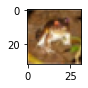

In [7]:
plot_sample(0)


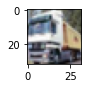

In [8]:
plot_sample(1)

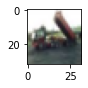

In [9]:
plot_sample(2)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

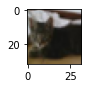

In [25]:
plot_sample(9)

In [24]:
classes[y_train[9][0]]

'cat'

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
X_test.shape

(10000, 32, 32, 3)

SCALING

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32')


y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32')

In [31]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [32]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8146 - accuracy: 0.3565
Epoch 2/2
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6255 - accuracy: 0.4253


Prediction check

In [35]:
np.argmax(model.predict(X_test_scaled)[0])

3

In [36]:
y_test[0]

array([3], dtype=uint8)

MEASURE TIME 

1. ON CPU

In [38]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
  model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 115s 73ms/step - loss: 1.4806 - accuracy: 0.4750
1 loop, best of 1: 1min 55s per loop
